**Stock prediction**





1.   Data collection
2.   data exploration


3.   Model fitting
4.  ploting






In [1]:
from sklearn.preprocessing import StandardScaler

In [2]:

import numpy as np # for Ml input
import pandas as pd # manipulating data functinality of exccel
import matplotlib.pyplot as plt # vis
import seaborn as sns # vis
import datetime # use for time stamps 
import pandas_datareader as dr
from sklearn.model_selection import train_test_split

**Importing Data**

get_data_yahoo will get data of stocks from yahoo finanace. The arguments are 

1.   Company code name
2.   start date in the form of a time stamp using datetime package of python
3.   End date 

The data is dtored in the form of pandas dataframe. You can also import data using other methods like quandal 





In [3]:
google_stocks = dr.get_data_yahoo('GOOG',datetime.datetime(2010,8,1),datetime.datetime(2019,8,1))

In [4]:
google_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2266 entries, 2010-08-02 to 2019-08-01
Data columns (total 6 columns):
High         2266 non-null float64
Low          2266 non-null float64
Open         2266 non-null float64
Close        2266 non-null float64
Volume       2266 non-null float64
Adj Close    2266 non-null float64
dtypes: float64(6)
memory usage: 123.9 KB


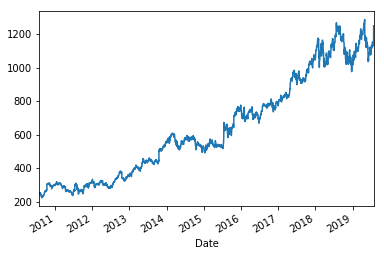

In [5]:
google_stocks['Adj Close'].plot()

In [6]:
google_stocks['comp']= google_stocks['Close']==google_stocks['Adj Close']
google_stocks['comp'].value_counts()

True    2266
Name: comp, dtype: int64

**Remove chetta**

# Data Preparation

Seperating label from the data frame, converting them to numpy arrays and spliting into train and test sets

In [7]:
y = google_stocks['Close']
X = google_stocks.drop(['Close','Adj Close','comp'], axis=1)


In [ ]:
y.

In [8]:
mean_y = y.mean()
std_y = y.std()
new_y = (y-mean_y)/std_y


Date
2010-08-02   -1.312412
2010-08-03   -1.313370
2010-08-04   -1.286129
2010-08-05   -1.283189
2010-08-06   -1.296206
2010-08-09   -1.287732
2010-08-10   -1.290441
2010-08-11   -1.310215
2010-08-12   -1.309769
2010-08-13   -1.319119
2010-08-16   -1.320374
2010-08-17   -1.312230
2010-08-18   -1.326057
2010-08-19   -1.349482
2010-08-20   -1.359311
2010-08-23   -1.355925
2010-08-24   -1.376871
2010-08-25   -1.371536
2010-08-26   -1.377549
2010-08-27   -1.364581
2010-08-30   -1.374724
2010-08-31   -1.379135
2010-09-01   -1.362103
2010-09-02   -1.357395
2010-09-03   -1.345633
2010-09-07   -1.355379
2010-09-08   -1.345170
2010-09-09   -1.335919
2010-09-10   -1.335985
2010-09-13   -1.325859
                ...   
2019-06-20    1.563248
2019-06-21    1.597936
2019-06-24    1.576844
2019-06-25    1.480108
2019-06-26    1.458386
2019-06-27    1.445818
2019-06-28    1.462067
2019-07-01    1.518577
2019-07-02    1.562684
2019-07-03    1.596941
2019-07-05    1.630137
2019-07-08    1.579597
2019-0

In [9]:
scaler = StandardScaler()
scaler.fit(X)
scaled_x = scaler.transform(X)


In [10]:
scaled_x.shape

(2266, 4)

In [16]:
X_scaled.shape

(2266, 4)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2266 entries, 2010-08-02 to 2019-08-01
Data columns (total 4 columns):
High      2266 non-null float64
Low       2266 non-null float64
Open      2266 non-null float64
Volume    2266 non-null float64
dtypes: float64(4)
memory usage: 88.5 KB


In [18]:
X_train, X_val = train_test_split(X,test_size=0.05,shuffle = False)
y_train, y_val = train_test_split(y,test_size=0.05, shuffle = False)

In [14]:
X_train_scaled, X_val_scaled = train_test_split(scaled_x,test_size=0.05,shuffle=False)
y_train_scaled, y_val_scaled = train_test_split(new_y,test_size=0.05,shuffle=False)

In [15]:
X_train_scaled.shape,X_val_scaled.shape

((2152, 4), (114, 4))

In [20]:
X_tr = np.array(X_train)
X_vala = np.array(X_val)
y_tr = np.array(y_train)
y_vala = np.array(y_val)

In [21]:
X_tr.shape, X_vala.shape, y_tr.shape, y_vala.shape

((2152, 4), (114, 4), (2152,), (114,))

# Modeling

Different Machine learnign algorithms were used for predicting stocks like
1. Linear Regressio
2. Lasso Regression.
3. Support Vector Machine.
4. KNearest neighbours
5. Elastic nets 


In [25]:
# Linear model Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_predict = linear.predict(X_val)
#linear_score = linear.score(linear_predict,y_vala)
#linear_score


Text(0.5, 1.0, 'Linear')

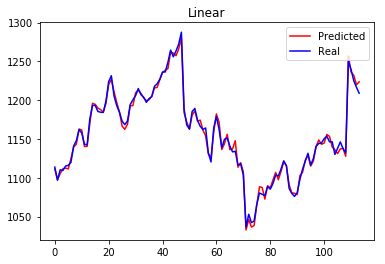

In [26]:
plt.plot(linear_predict,'r', label = 'Predicted')
plt.plot(y_vala, 'b', label = 'Real')
plt.legend(loc= 'upper right')
plt.title('Linear')

In [28]:
# Liner scaleed
linear_scaled = LinearRegression()
linear_scaled.fit(X_train_scaled,y_train_scaled)
linear_scaled_predict = linear_scaled.predict(X_val_scaled)


In [31]:
y_val_scaled_nu = np.array(y_val_scaled)


Text(0.5, 1.0, 'Linear_scalec')

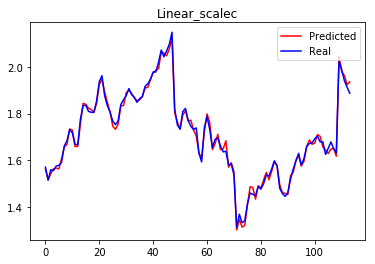

In [32]:
plt.plot(linear_scaled_predict,'r', label = 'Predicted')
plt.plot(y_val_scaled_nu, 'b', label = 'Real')
plt.legend(loc= 'upper right')
plt.title('Linear_scalec')

/home/karthik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Text(0.5, 1.0, 'SGD')

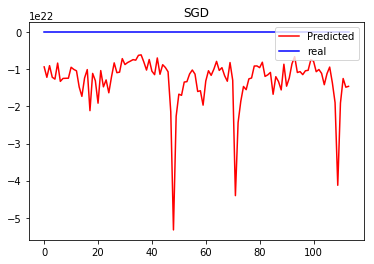

In [34]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train,y_train)
sgd_predict = sgd_regressor.predict(X_val)

plt.plot(sgd_predict,'r',label = 'Predicted')
plt.plot(y_vala,'b', label ='real')
plt.legend(loc= 'upper right')
plt.title('SGD')




/home/karthik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Text(0.5, 1.0, 'SGD_sclaed')

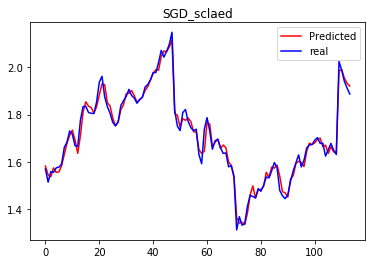

In [35]:
# sgd REGRESSOR
sgd_scaled = SGDRegressor()
sgd_scaled.fit(X_train_scaled,y_train_scaled)
sgd_scaled_predict = sgd_scaled.predict(X_val_scaled)

plt.plot(sgd_scaled_predict,'r',label = 'Predicted')
plt.plot(y_val_scaled_nu,'b', label ='real')
plt.legend(loc= 'upper right')
plt.title('SGD_sclaed')




In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_tr,y_tr)
knn_predict = knn.predict(X_vala)
knn_score = knn.score(X_vala,y_vala)


Text(0.5, 1.0, 'KNN')

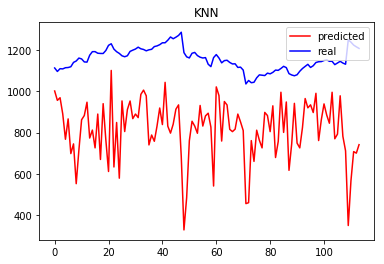

In [38]:
knn_score
plt.plot(knn_predict,'r',label = 'predicted')
plt.plot(y_vala,'b',label = 'real')
plt.legend(loc= 'upper right')
plt.title('KNN')

Text(0.5, 1.0, 'KNN_scaled')

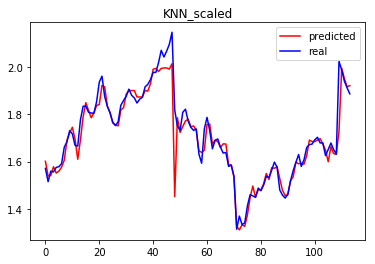

In [39]:
# knn normalized 
knn_sca = KNeighborsRegressor()
knn_sca.fit(X_train_scaled,y_train_scaled)
knn_scal_predict = knn_sca.predict(X_val_scaled)
plt.plot(knn_scal_predict,'r',label = 'predicted')
plt.plot(y_val_scaled_nu,'b',label = 'real')
plt.legend(loc= 'upper right')
plt.title('KNN_scaled')


/home/karthik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 1.0, 'Lasso')

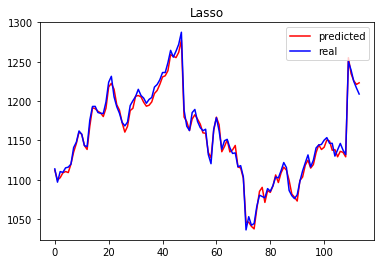

In [60]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_tr,y_tr)
lasso_predict =lasso.predict(X_vala)

plt.plot(lasso_predict,'r',label = 'predicted')
plt.plot(y_vala,'b',label = 'real')
plt.legend(loc= 'upper right')
plt.title('Lasso')

In [22]:
from sklearn.svm import SVR
svm_rbf = SVR(kernel='rbf')
svm_linear = SVR(kernel='linear')
svm_poly = SVR(kernel='poly')
svm_rbf.fit(X_tr,y_tr)
svm_linear.fit(X_tr,y_tr)
svm_poly.fit(X_tr,y_tr)
svm_rbf_predict = svm_rbf.predict(X_vala)
svm_linear_predict = svm_linear.predict(X_vala)
snm_poly_predict = svm_poly.predict(X_vala)


/home/karthik/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/karthik/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
from sklearn.svm import SVR

svm_rbf = SVR(kernel='rbf')
svm_linear = SVR(kernel='linear')
svm_poly = SVR(kernel='poly')
svm_rbf.fit(X_train_scaled,y_train_scaled)
svm_linear.fit(X_train_scaled,y_train_scaled)
svm_poly.fit(X_train_scaled,y_train_scaled)
svm_rbf_predict = svm_rbf.predict(X_val_scaled)
svm_linear_predict = svm_linear.predict(X_val_scaled)
snm_poly_predict = svm_poly.predict(X_val_scaled)

/home/karthik/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/karthik/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


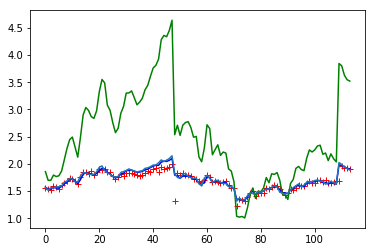

In [42]:
plt.plot(svm_rbf_predict,'r+')
plt.plot(svm_linear_predict, 'b')
plt.plot(snm_poly_predict,'g')
plt.plot(y_val_scaled_nu)

Text(0.5, 1.0, 'SVMLinear')

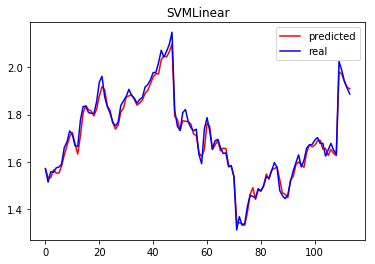

In [43]:
plt.plot(svm_linear_predict,'r',label = 'predicted')
plt.plot(y_val_scaled_nu,'b',label = 'real')
plt.legend(loc= 'upper right')
plt.title('SVMLinear')

Text(0.5, 1.0, 'SVM poly')

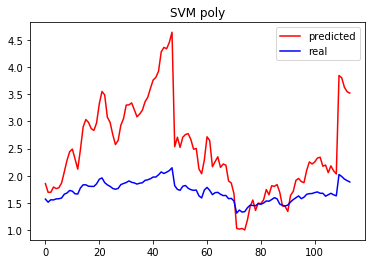

In [44]:
plt.plot(snm_poly_predict,'r',label = 'predicted')
plt.plot(y_val_scaled_nu,'b',label = 'real')
plt.legend(loc= 'upper right')
plt.title('SVM poly')

Text(0.5, 1.0, 'SVM rbf')

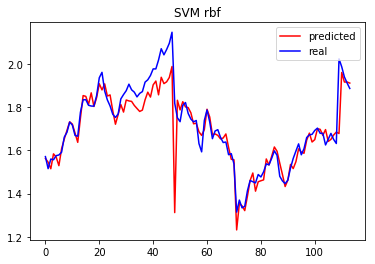

In [45]:
plt.plot(svm_rbf_predict,'r',label = 'predicted')
plt.plot(y_val_scaled_nu,'b',label = 'real')
plt.legend(loc= 'upper right')
plt.title('SVM rbf')

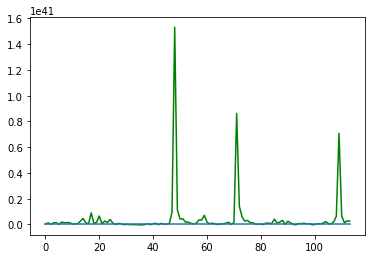

In [28]:
plt.plot(snm_poly_predict,'g')
plt.plot(y_vala)

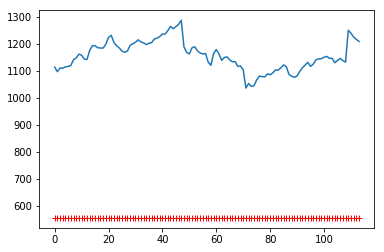

In [29]:
plt.plot(svm_rbf_predict,'r+')
plt.plot(y_vala)

/home/karthik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 1.0, 'ElasticNet')

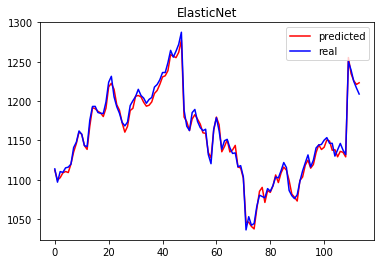

In [46]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_tr,y_tr)
elastic_net_predict = elastic_net.predict(X_vala)
plt.plot(elastic_net_predict,'r', label ='predicted')
plt.plot(y_vala,'b', label = 'real')
plt.legend(loc ='upper right')
plt.title('ElasticNet')

Text(0.5, 1.0, 'ElasticNet')

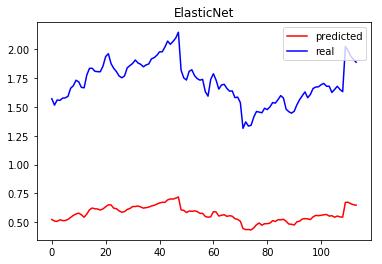

In [47]:
elastic_net_scaled = ElasticNet()
elastic_net_scaled.fit(X_train_scaled,y_train_scaled)
elastic_net_predict_scaled = elastic_net_scaled.predict(X_val_scaled)

plt.plot(elastic_net_predict_scaled,'r',label = 'predicted')
plt.plot(y_val_scaled_nu,'b',label = 'real')
plt.legend(loc= 'upper right')
plt.title('ElasticNet')

# Best Predictions are from Linear, Lasso, Elastic net regressions



Text(0.5, 1.0, 'ElasticNet')

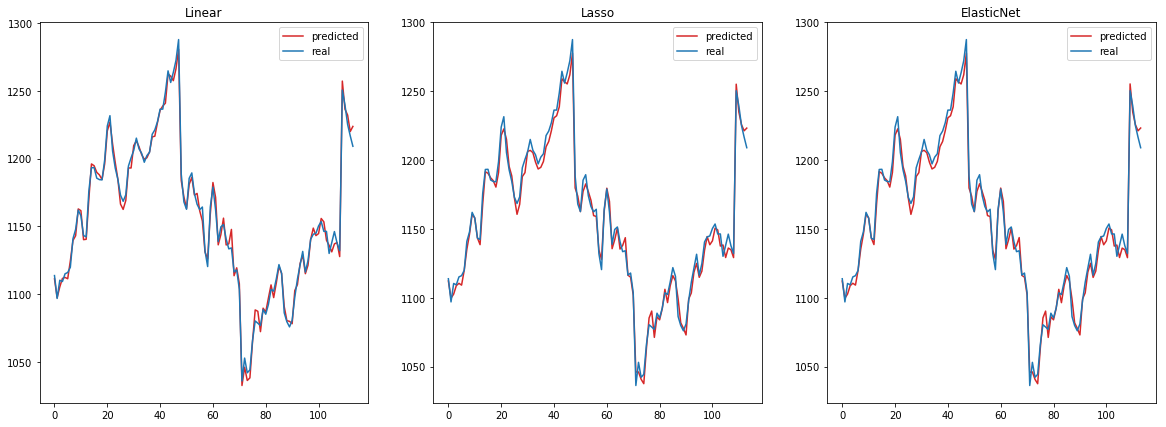

In [62]:
fig, axes = plt.subplots(1,3, figsize=(20,7))
axes[0].plot(linear_predict,'tab:red', label = 'predicted')
axes[0].plot(y_vala, 'tab:blue', label = 'real')
axes[0].legend(loc='upper right')
axes[0].set_title('Linear')
axes[1].plot(lasso_predict,'tab:red',label = 'predicted')
axes[1].plot(y_vala, 'tab:blue',label = 'real')
axes[1].legend(loc='upper right')
axes[1].set_title('Lasso')            
axes[2].plot(elastic_net_predict,'tab:red',label = 'predicted')
axes[2].plot(y_vala, 'tab:blue',label = 'real')
axes[2].legend(loc='upper right')
axes[2].set_title('ElasticNet')